In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
news = pd.read_csv("OnlineNewsPopularity.csv")

# Cleaning dataset

In [4]:
news.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [5]:
news.drop(["url", " timedelta"], axis = 1, inplace = True)

In [6]:
news.head()

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length  ...   min_positive_polarity  \
0          0.0               4.680365  ...                0.100000   
1          0.0               4.913725  ...                0.033333   
2          0.0               4.393365  ...                0.100000   
3          0.0               4.404896  ...                0.136364   
4          0.0               4.682836  ...                0.033333   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                     0.7               -0.350000                  -0.600   
1                     0.7               -0.118750                  -0.125   
2                     1.0               -0.466667                  -0.800   
3                     0.8               -0.369697                  -0.600   
4                     1.0               -0.220192                  -0.500   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -0.200000             0.500000                  -0.187500   
1               -0.100000             0.000000                   0.000000   
2               -0.133333             0.000000                   0.000000   
3               -0.166667             0.000000                   0.000000   
4               -0.050000             0.454545                   0.136364   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                 0.000000                       0.187500      593  
1                 0.500000                       0.000000      711  
2                 0.500000                       0.000000     1500  
3                 0.500000                       0.000000     1200  
4                 0.045455                       0.136364      505  

[5 rows x 59 columns]

In [7]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  float64
 1    n_tokens_content               39644 non-null  float64
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  float64
 6    num_self_hrefs                 39644 non-null  float64
 7    num_imgs                       39644 non-null  float64
 8    num_videos                     39644 non-null  float64
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  float64
 11   data_channel_is_lifestyle      39644 non-null  float64
 12   data_channel_is_entertainment  

In [8]:
news.describe()

n_tokens_title   n_tokens_content   n_unique_tokens  \
count     39644.000000       39644.000000      39644.000000   
mean         10.398749         546.514731          0.548216   
std           2.114037         471.107508          3.520708   
min           2.000000           0.000000          0.000000   
25%           9.000000         246.000000          0.470870   
50%          10.000000         409.000000          0.539226   
75%          12.000000         716.000000          0.608696   
max          23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     39644.000000  39644.000000  39644.000000           39644.000000   
mean          3.293638      4.544143      1.249874               4.548239   
std           3.855141      8.309434      4.107855               0.844406   
min           0.000000      0.000000      0.000000               0.000000   
25%           1.000000      1.000000      0.000000               4.478404   
50%           3.000000      1.000000      0.000000               4.664082   
75%           4.000000      4.000000      1.000000               4.854839   
max         116.000000    128.000000     91.000000               8.041534   

       ...   min_positive_polarity   max_positive_polarity  \
count  ...            39644.000000            39644.000000   
mean   ...                0.095446                0.756728   
std    ...                0.071315                0.247786   
min    ...                0.000000                0.000000   
25%    ...                0.050000                0.600000   
50%    ...                0.100000                0.800000   
75%    ...                0.100000                1.000000   
max    ...                1.000000                1.000000   

        avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                -0.259524               -0.521944               -0.107500   
std                  0.127726                0.290290                0.095373   
min                 -1.000000               -1.000000               -1.000000   
25%                 -0.328383               -0.700000               -0.125000   
50%                 -0.253333               -0.500000               -0.100000   
75%                 -0.186905               -0.300000               -0.050000   
max                  0.000000                0.000000                0.000000   

        title_subjectivity   title_sentiment_polarity  \
count         39644.000000               39644.000000   
mean              0.282353                   0.071425   
std               0.324247                   0.265450   
min               0.000000                  -1.000000   
25%               0.000000                   0.000000   
50%               0.150000                   0.000000   
75%               0.500000                   0.150000   
max               1.000000                   1.000000   

        abs_title_subjectivity   abs_title_sentiment_polarity         shares  
count             39644.000000                   39644.000000   39644.000000  
mean                  0.341843                       0.156064    3395.380184  
std                   0.188791                       0.226294   11626.950749  
min  

In [9]:
news.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

In [10]:
news.shape

(39644, 59)

## Removing empty spaces at the beginning of each column name

In [11]:
news.columns = news.columns.str.lstrip()

In [12]:
news.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [13]:
news.shares

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

In [14]:
news.shares.min()

1

In [15]:
news.shares.max()

843300

In [16]:
news.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

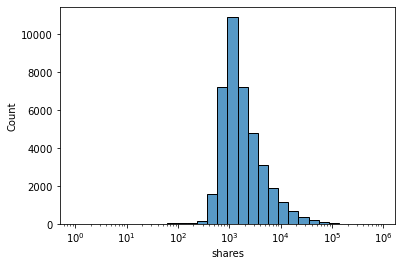

In [18]:
sns.histplot(data = news, x = "shares", log_scale= True, bins = 30)

plt.show()

In [19]:
def sh_class(news):
    if news["shares"] <= 1000:
        return "low"
    elif (news["shares"] > 1000) & (news["shares"] <= 3000):
        return "medium"
    elif (news["shares"] > 3000):
        return "high"

In [20]:
news["shares_class"] = news.apply(lambda news: sh_class(news), axis = 1)

In [21]:
news.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              4.680365  ...                    0.7              -0.350000   
1              4.913725  ...                    0.7              -0.118750   
2              4.393365  ...                    1.0              -0.466667   
3              4.404896  ...                    0.8              -0.369697   
4              4.682836  ...                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_class  
0                      0.187500     593           low  
1                      0.000000     711           low  
2                      0.000000    1500        medium  
3                      0.000000    1200        medium  
4                      0.136364     505           low  

[5 rows x 60 columns]

## removing columns with unknown content

In [22]:
news.drop(["LDA_00", "LDA_01", "LDA_02", "LDA_03", "LDA_04"], axis = 1, inplace = True)

In [23]:
news.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              4.680365  ...                    0.7              -0.350000   
1              4.913725  ...                    0.7              -0.118750   
2              4.393365  ...                    1.0              -0.466667   
3              4.404896  ...                    0.8              -0.369697   
4              4.682836  ...                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_class  
0                      0.187500     593           low  
1                      0.000000     711           low  
2                      0.000000    1500        medium  
3                      0.000000    1200        medium  
4                      0.136364     505           low  

[5 rows x 55 columns]

In [24]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  float64
 1   n_tokens_content               39644 non-null  float64
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  float64
 6   num_self_hrefs                 39644 non-null  float64
 7   num_imgs                       39644 non-null  float64
 8   num_videos                     39644 non-null  float64
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  float64
 11  data_channel_is_lifestyle      39644 non-null  float64
 12  data_channel_is_entertainment  39644 non-null 

In [25]:
news.isna().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

In [27]:
news.to_csv("news.csv", index = False)

# EDA

## Correlation matrix

In [28]:
news = pd.read_csv("news.csv")

In [29]:
news.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              4.680365  ...                    0.7              -0.350000   
1              4.913725  ...                    0.7              -0.118750   
2              4.393365  ...                    1.0              -0.466667   
3              4.404896  ...                    0.8              -0.369697   
4              4.682836  ...                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_class  
0                      0.187500     593           low  
1                      0.000000     711           low  
2                      0.000000    1500        medium  
3                      0.000000    1200        medium  
4                      0.136364     505           low  

[5 rows x 55 columns]

In [30]:
news_corr = news.corr()
news_corr

n_tokens_title  n_tokens_content  \
n_tokens_title                       1.000000          0.018160   
n_tokens_content                     0.018160          1.000000   
n_unique_tokens                     -0.005318         -0.004737   
n_non_stop_words                    -0.004754          0.017512   
n_non_stop_unique_tokens            -0.005420          0.000373   
num_hrefs                           -0.053496          0.423065   
num_self_hrefs                      -0.014856          0.304682   
num_imgs                            -0.008858          0.342600   
num_videos                           0.051460          0.103699   
average_token_length                -0.071403          0.167789   
num_keywords                        -0.006077          0.072845   
data_channel_is_lifestyle           -0.070815          0.037548   
data_channel_is_entertainment        0.132791          0.060200   
data_channel_is_bus                 -0.023902         -0.006105   
data_channel_is_socmed              -0.090394          0.033424   
data_channel_is_tech                -0.046716          0.025408   
data_channel_is_world                0.049223          0.055989   
kw_min_min                          -0.110672         -0.054345   
kw_max_min                          -0.005890          0.000066   
kw_avg_min                          -0.031400         -0.003545   
kw_min_max                           0.012926         -0.022786   
kw_max_max                           0.120841          0.058860   
kw_avg_max                           0.115746         -0.096460   
kw_min_avg                          -0.002370         -0.022286   
kw_max_avg                           0.006918         -0.030496   
kw_avg_avg                           0.004296         -0.079624   
self_reference_min_shares           -0.004563         -0.030686   
self_reference_max_shares            0.000128          0.025657   
self_reference_avg_sharess           0.000661         -0.013809   
weekday_is_monday                    0.004274         -0.002484   
weekday_is_tuesday                   0.009322         -0.004027   
weekday_is_wednesday                 0.008935         -0.016891   
weekday_is_thursday                 -0.015472         -0.007395   
weekday_is_friday                   -0.002015         -0.015949   
weekday_is_saturday                 -0.015013          0.034538   
weekday_is_sunday                    0.006289          0.036394   
is_weekend                          -0.005996          0.052024   
global_subjectivity                 -0.056804          0.127879   
global_sentiment_polarity           -0.072226          0.021937   
global_rate_positive_words          -0.064951          0.133979   
global_rate_negative_words           0.015530          0.125013   
rate_positive_words                 -0.066589          0.098960   
rate_negative_words                  0.034186          0.101053   
avg_positive_polarity               -0.049619          0.135123   
min_positive_polarity               -0.025069         -0.261493   
max_positive_polarity               -0.021662          0.415706   
avg_negative_polarity               -0.017096         -0.130375   
min_negative_polarity               -0.029146         -0.450603   
max_negative_polarity                0.011425          0.225870   
title_subjectivity                   0.077245          0.004484   
title_sentiment_polarity             0.000240          0.023358   
abs_title_subjectivity              -0.146954          0.007136   
abs_title_sentiment_polarity         0.040550          0.013439   
shares                               0.008783          0.002459   

                               n_unique_tokens  n_non_stop_words  \
n_tokens_title                       -0.005318         -0.004754   
n_tokens_content                     -0.004737          0.017512   
n_unique_tokens                       1.000000          0.999572   
n_non_stop_words                      0.999572          1.000000   
n_non

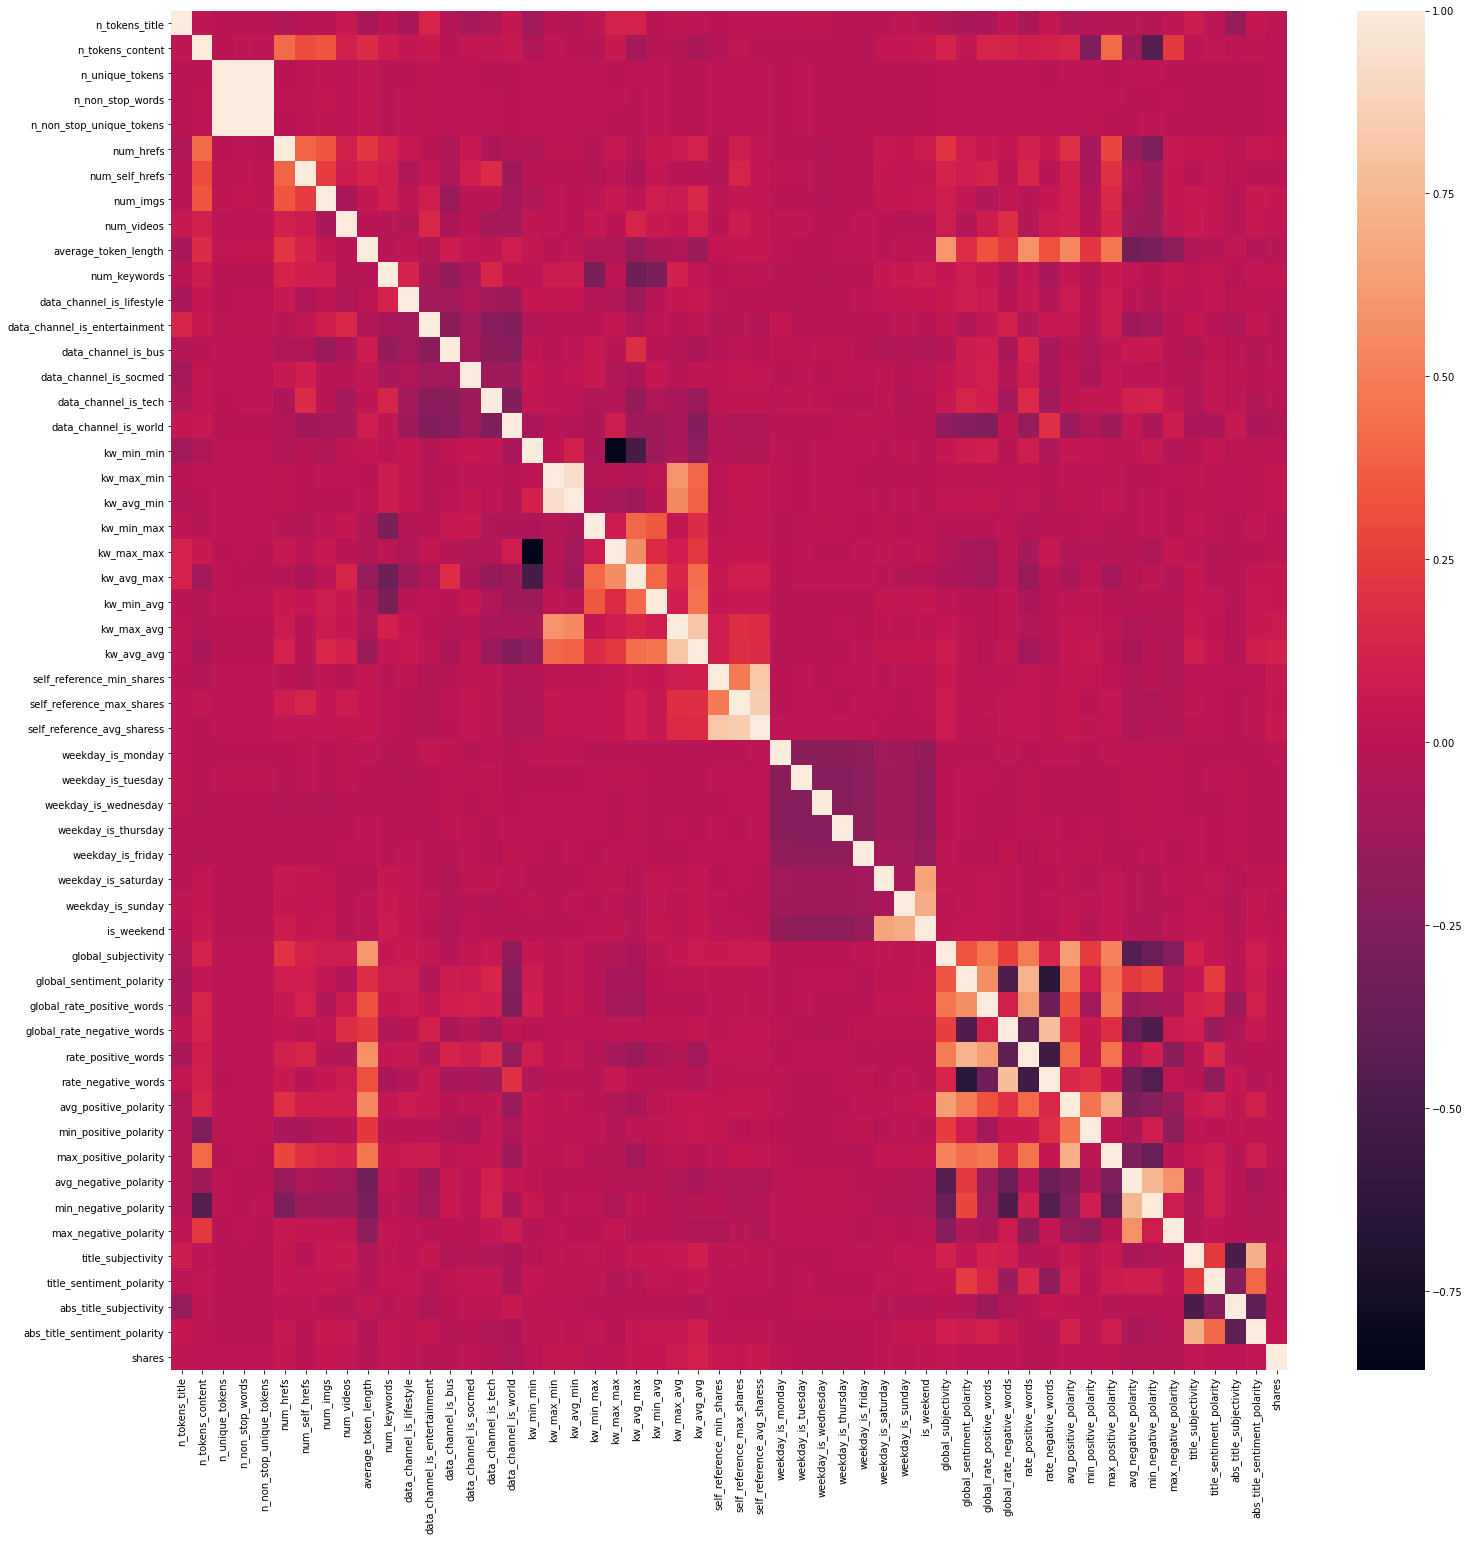

In [31]:
plt.subplots(figsize = (25,25))
sns.heatmap(news.corr())
plt.show()

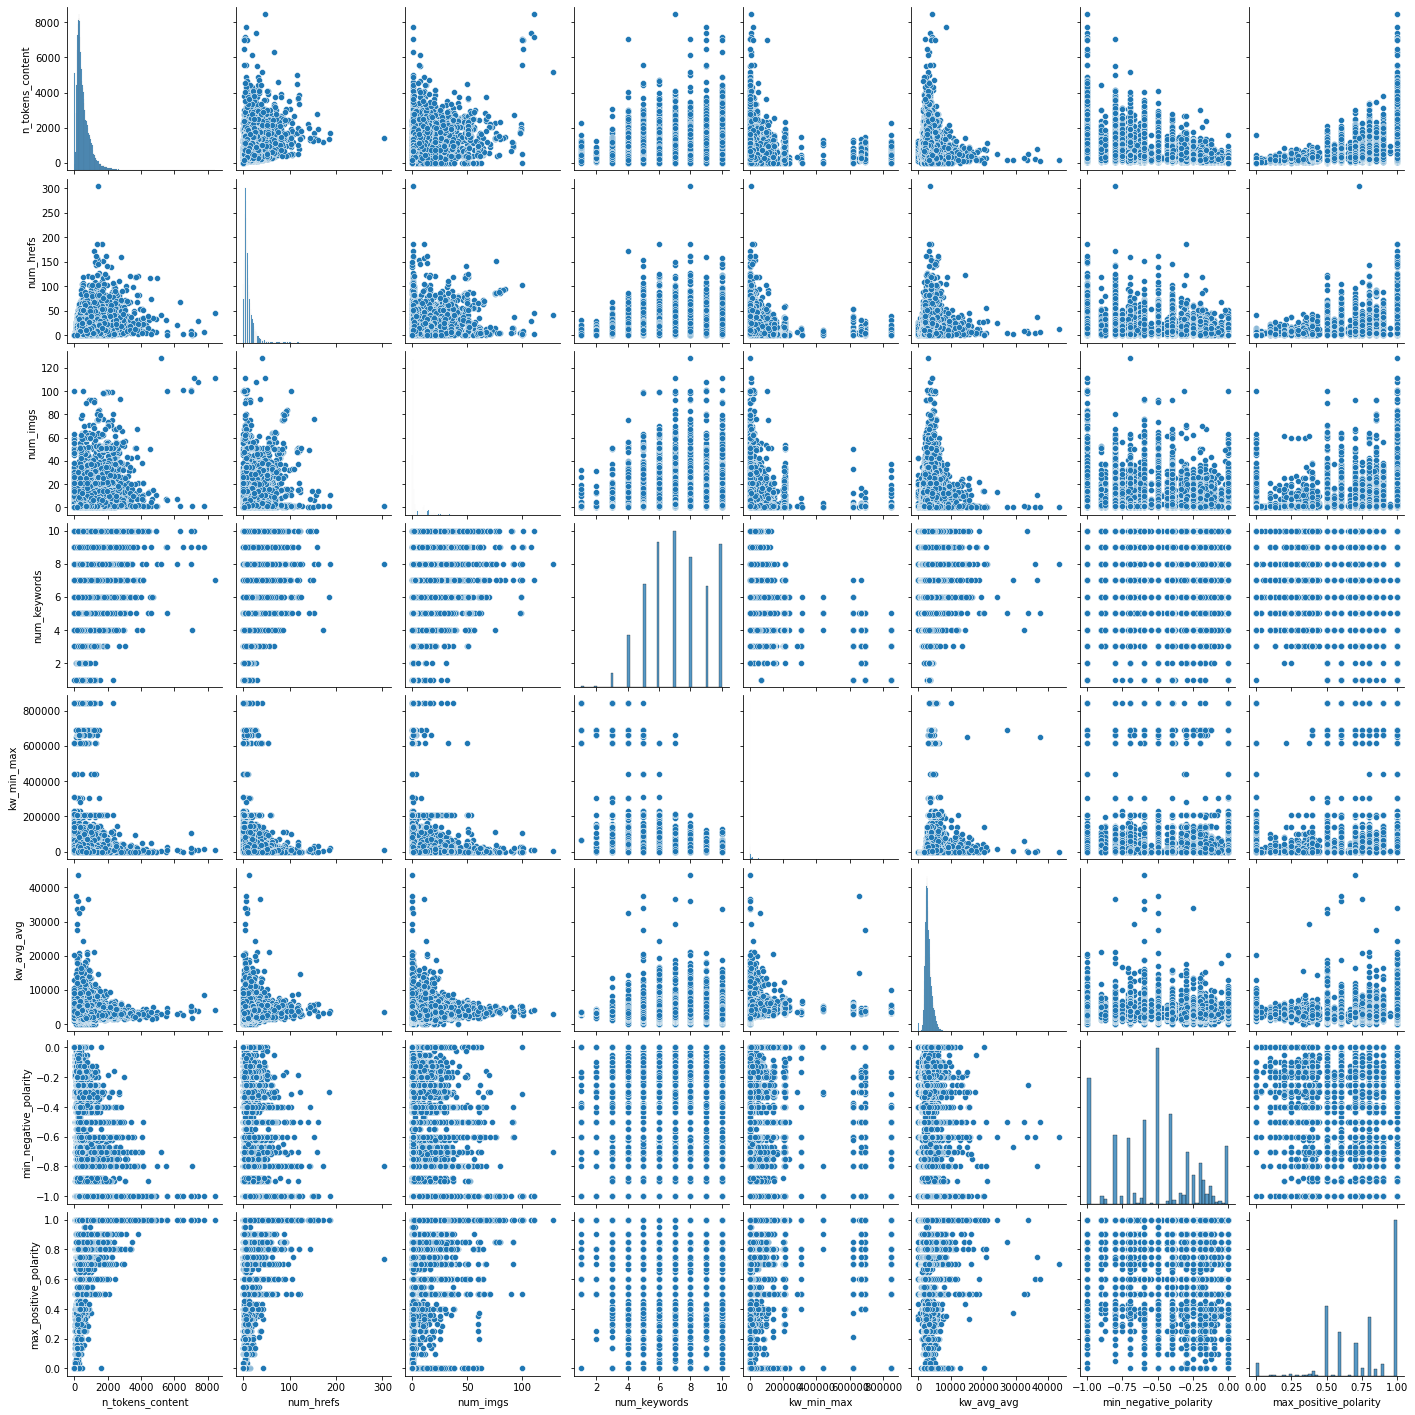

In [32]:
sns.pairplot(news[["n_tokens_content", "num_hrefs", "num_imgs", "num_keywords",
                  "kw_min_max", "kw_avg_avg", "min_negative_polarity","max_positive_polarity"]])

In [33]:
news_corr_sorted = news.corr().unstack().sort_values().drop_duplicates()

In [34]:
news_corr_sorted.head(20)

kw_max_max                  kw_min_min                     -0.857226
rate_negative_words         global_sentiment_polarity      -0.650717
                            rate_positive_words            -0.530962
kw_min_min                  kw_avg_max                     -0.502719
abs_title_subjectivity      title_subjectivity             -0.487172
global_rate_negative_words  min_negative_polarity          -0.478499
                            global_sentiment_polarity      -0.471982
rate_negative_words         min_negative_polarity          -0.452522
min_negative_polarity       n_tokens_content               -0.450603
avg_negative_polarity       global_subjectivity            -0.443187
abs_title_subjectivity      abs_title_sentiment_polarity   -0.400272
global_rate_negative_words  rate_positive_words            -0.398689
min_negative_polarity       max_positive_polarity          -0.360871
global_rate_negative_words  avg_negative_polarity          -0.352242
global_subjectivity         min_ne

In [35]:
news_corr_sorted.tail(20)

avg_negative_polarity         max_negative_polarity        0.580108
kw_max_avg                    kw_max_min                   0.590468
global_subjectivity           average_token_length         0.597629
global_rate_positive_words    rate_positive_words          0.628626
avg_positive_polarity         global_subjectivity          0.631749
weekday_is_saturday           is_weekend                   0.661707
weekday_is_sunday             is_weekend                   0.701648
avg_positive_polarity         max_positive_polarity        0.703558
abs_title_sentiment_polarity  title_subjectivity           0.714528
global_sentiment_polarity     rate_positive_words          0.727827
avg_negative_polarity         min_negative_polarity        0.748896
global_rate_negative_words    rate_negative_words          0.779556
kw_avg_avg                    kw_max_avg                   0.811864
self_reference_avg_sharess    self_reference_min_shares    0.818907
                              self_reference_max

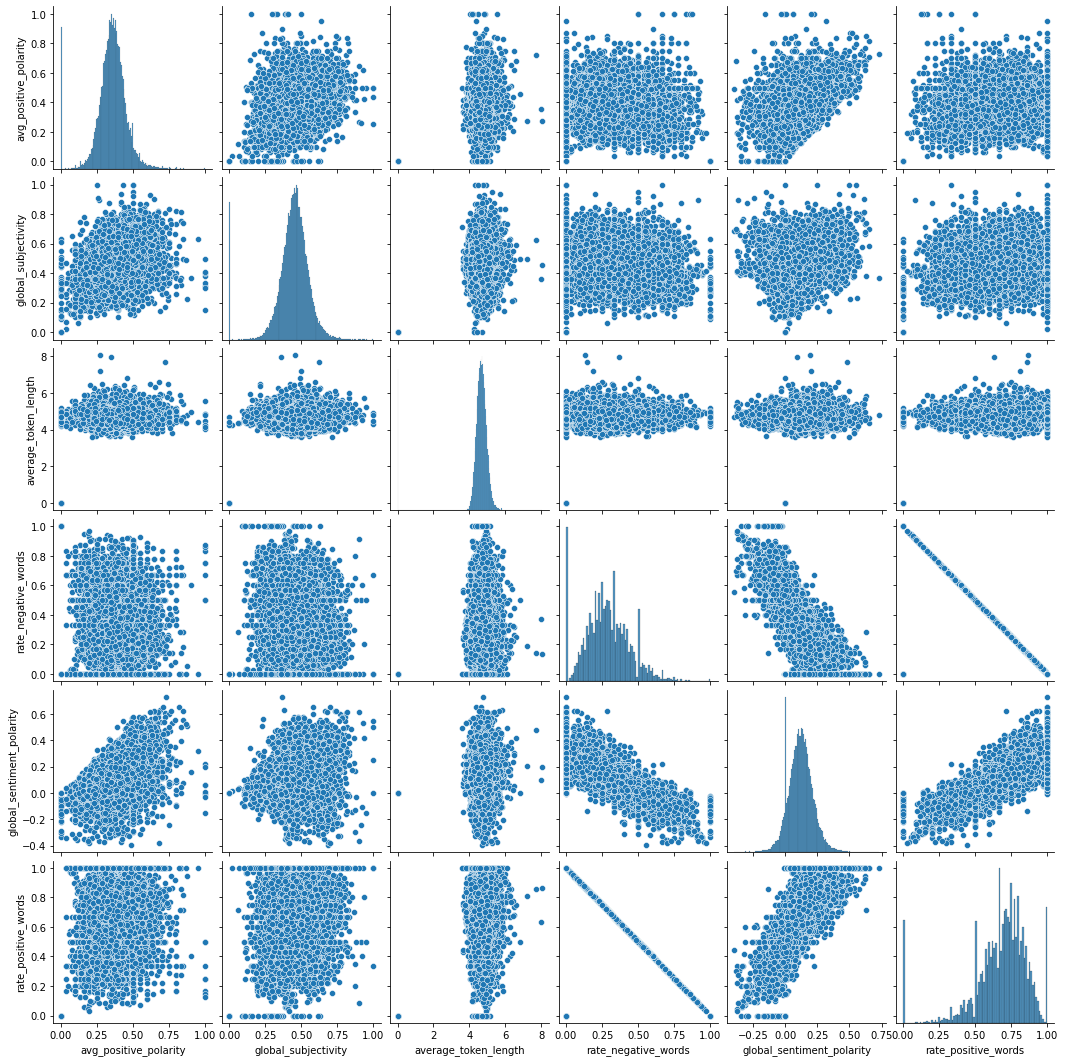

In [36]:
sns.pairplot(news[["avg_positive_polarity", "global_subjectivity", "average_token_length", "rate_negative_words",
                  "global_sentiment_polarity", "rate_positive_words"]])
plt.show()

In [37]:
news_subset = news[["avg_positive_polarity", "global_subjectivity", "average_token_length", "rate_negative_words",
                  "global_sentiment_polarity", "rate_positive_words", "shares_class"]]

In [38]:
news_subset.head()

avg_positive_polarity  global_subjectivity  average_token_length  \
0               0.378636             0.521617              4.680365   
1               0.286915             0.341246              4.913725   
2               0.495833             0.702222              4.393365   
3               0.385965             0.429850              4.404896   
4               0.411127             0.513502              4.682836   

   rate_negative_words  global_sentiment_polarity  rate_positive_words  \
0             0.230769                   0.092562             0.769231   
1             0.266667                   0.148948             0.733333   
2             0.142857                   0.323333             0.857143   
3             0.333333                   0.100705             0.666667   
4             0.139785                   0.281003             0.860215   

  shares_class  
0          low  
1          low  
2       medium  
3       medium  
4          low

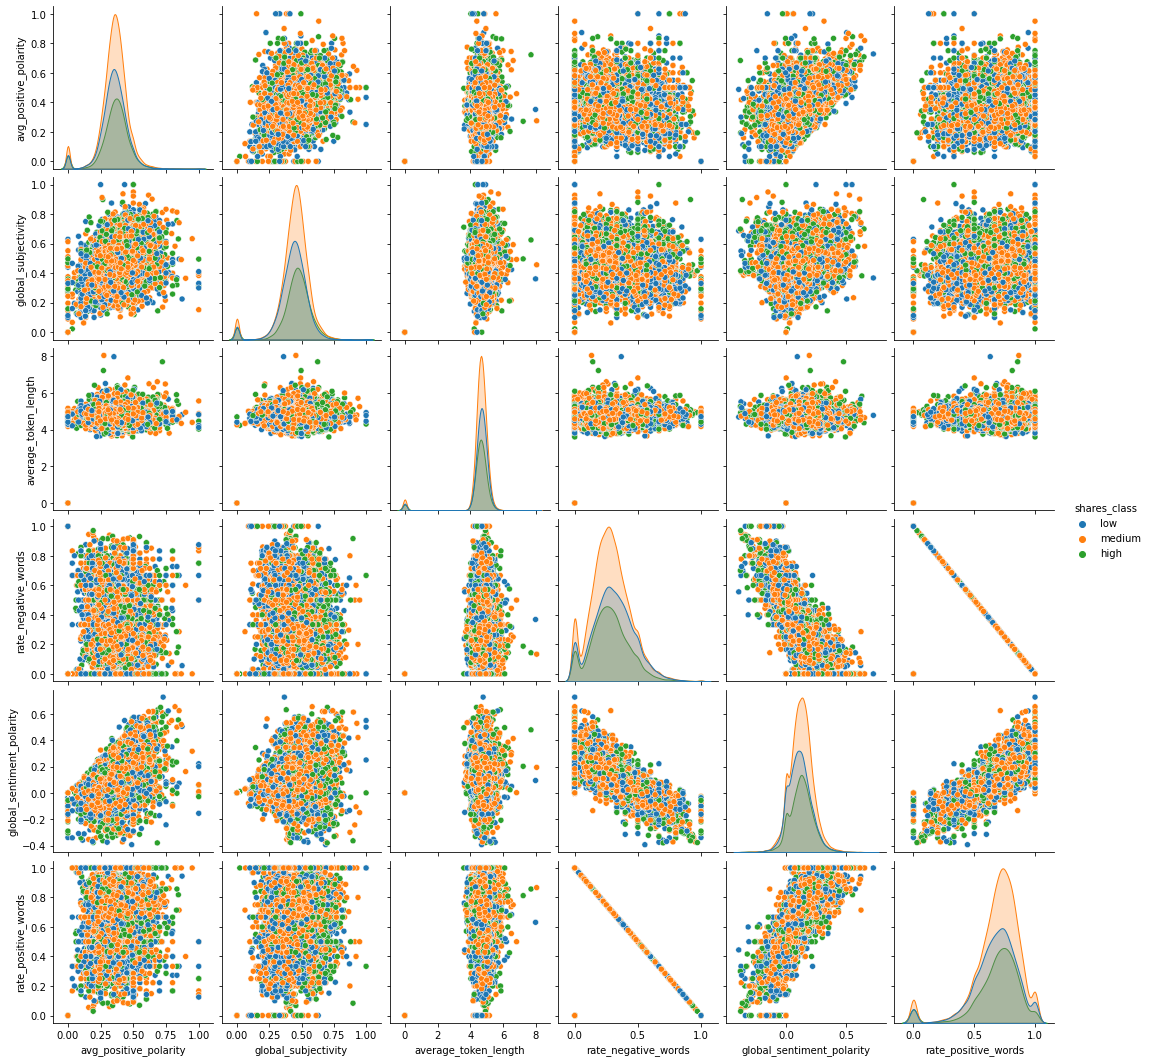

In [39]:
sns.pairplot(news_subset, hue = "shares_class")
plt.show()

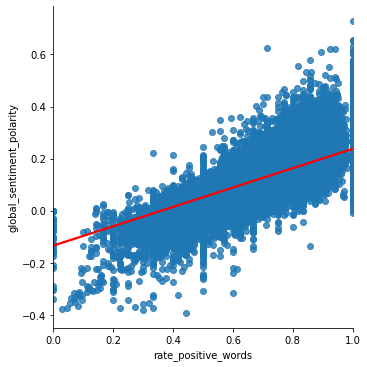

In [40]:
sns.lmplot(x="rate_positive_words", y="global_sentiment_polarity", data=news_subset, line_kws={'color': 'red'})
plt.show()

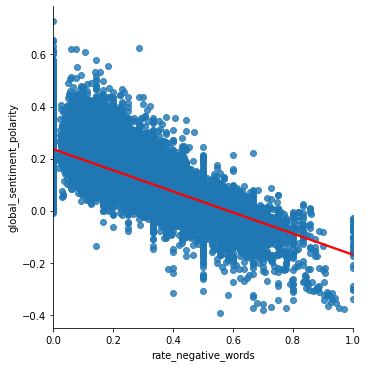

In [41]:
sns.lmplot(x="rate_negative_words", y="global_sentiment_polarity", data=news_subset, line_kws={'color': 'red'})
plt.show()

In [42]:
# Sentiment polarity for an element defines the orientation of the expressed sentiment, 
# i.e., it determines if the text expresses the positive, negative or neutral sentiment of 
# the user about the entity in consideration

In [173]:
shares_corr = pd.DataFrame(news.corr().shares)
shares_corr

shares
n_tokens_title                 0.008783
n_tokens_content               0.002459
n_unique_tokens                0.000806
n_non_stop_words               0.000443
n_non_stop_unique_tokens       0.000114
num_hrefs                      0.045404
num_self_hrefs                -0.001900
num_imgs                       0.039388
num_videos                     0.023936
average_token_length          -0.022007
num_keywords                   0.021818
data_channel_is_lifestyle      0.005831
data_channel_is_entertainment -0.017006
data_channel_is_bus           -0.012376
data_channel_is_socmed         0.005021
data_channel_is_tech          -0.013253
data_channel_is_world         -0.049497
kw_min_min                    -0.001051
kw_max_min                     0.030114
kw_avg_min                     0.030406
kw_min_max                     0.003901
kw_max_max                     0.007863
kw_avg_max                     0.044686
kw_min_avg                     0.039551
kw_max_avg                     0.064306
kw_avg_avg                     0.110413
self_reference_min_shares      0.055958
self_reference_max_shares      0.047115
self_reference_avg_sharess     0.057789
weekday_is_monday              0.009726
weekday_is_tuesday            -0.007941
weekday_is_wednesday          -0.003801
weekday_is_thursday           -0.008833
weekday_is_friday             -0.003884
weekday_is_saturday            0.015082
weekday_is_sunday              0.008230
is_weekend                     0.016958
global_subjectivity            0.031604
global_sentiment_polarity      0.004163
global_rate_positive_words     0.000543
global_rate_negative_words     0.006615
rate_positive_words           -0.013241
rate_negative_words           -0.005183
avg_positive_polarity          0.012142
min_positive_polarity         -0.000040
max_positive_polarity          0.010068
avg_negative_polarity         -0.032029
min_negative_polarity         -0.019297
max_negative_polarity         -0.019300
title_subjectivity             0.021967
title_sentiment_polarity       0.012772
abs_title_subjectivity         0.001481
abs_title_sentiment_polarity   0.027135
shares                         1.000000

In [175]:
sorted_shares_corr = shares_corr.sort_values(by='shares', ascending=False)
sorted_shares_corr

shares
shares                         1.000000
kw_avg_avg                     0.110413
kw_max_avg                     0.064306
self_reference_avg_sharess     0.057789
self_reference_min_shares      0.055958
self_reference_max_shares      0.047115
num_hrefs                      0.045404
kw_avg_max                     0.044686
kw_min_avg                     0.039551
num_imgs                       0.039388
global_subjectivity            0.031604
kw_avg_min                     0.030406
kw_max_min                     0.030114
abs_title_sentiment_polarity   0.027135
num_videos                     0.023936
title_subjectivity             0.021967
num_keywords                   0.021818
is_weekend                     0.016958
weekday_is_saturday            0.015082
title_sentiment_polarity       0.012772
avg_positive_polarity          0.012142
max_positive_polarity          0.010068
weekday_is_monday              0.009726
n_tokens_title                 0.008783
weekday_is_sunday              0.008230
kw_max_max                     0.007863
global_rate_negative_words     0.006615
data_channel_is_lifestyle      0.005831
data_channel_is_socmed         0.005021
global_sentiment_polarity      0.004163
kw_min_max                     0.003901
n_tokens_content               0.002459
abs_title_subjectivity         0.001481
n_unique_tokens                0.000806
global_rate_positive_words     0.000543
n_non_stop_words               0.000443
n_non_stop_unique_tokens       0.000114
min_positive_polarity         -0.000040
kw_min_min                    -0.001051
num_self_hrefs                -0.001900
weekday_is_wednesday          -0.003801
weekday_is_friday             -0.003884
rate_negative_words           -0.005183
weekday_is_tuesday            -0.007941
weekday_is_thursday           -0.008833
data_channel_is_bus           -0.012376
rate_positive_words           -0.013241
data_channel_is_tech          -0.013253
data_channel_is_entertainment -0.017006
min_negative_polarity         -0.019297
max_negative_polarity         -0.019300
average_token_length          -0.022007
avg_negative_polarity         -0.032029
data_channel_is_world         -0.049497

## Predictive power score

In [44]:
import ppscore as pps

In [45]:
ps_mat =pps.matrix(news)

In [46]:
ps_mat

x                             y   ppscore            case  \
0     n_tokens_title                n_tokens_title  1.000000  predict_itself   
1     n_tokens_title              n_tokens_content  0.000000      regression   
2     n_tokens_title               n_unique_tokens  0.000000      regression   
3     n_tokens_title              n_non_stop_words  0.000000      regression   
4     n_tokens_title      n_non_stop_unique_tokens  0.000000      regression   
...              ...                           ...       ...             ...   
3020    shares_class      title_sentiment_polarity  0.000000      regression   
3021    shares_class        abs_title_subjectivity  0.000000      regression   
3022    shares_class  abs_title_sentiment_polarity  0.000000      regression   
3023    shares_class                        shares  0.165441      regression   
3024    shares_class                  shares_class  1.000000  predict_itself   

      is_valid_score               metric  baseline_score  model_score  \
0               True                 None        0.000000     1.000000   
1               True  mean absolute error      317.223600   337.706769   
2               True  mean absolute error        0.095578     0.096024   
3               True  mean absolute error        0.032200     0.062388   
4               True  mean absolute error        0.097393     0.099467   
...              ...                  ...             ...          ...   
3020            True  mean absolute error        0.155897     0.177887   
3021            True  mean absolute error        0.159388     0.173635   
3022            True  mean absolute error        0.155874     0.173893   
3023            True  mean absolute error     2555.905400  2133.054676   
3024            True                 None        0.000000     1.000000   

                        model  
0                        None  
1     DecisionTreeRegressor()  
2     DecisionTreeRegressor()  
3     DecisionTreeRegressor()  
4     DecisionTreeRegressor()  
...                       ...  
3020  DecisionTreeRegressor()  
3021  DecisionTreeRegressor()  
3022  DecisionTreeRegressor()  
3023  DecisionTreeRegressor()  
3024                     None  

[3025 rows x 9 columns]

In [47]:
ps_mat_small = ps_mat.loc[ps_mat.ppscore > 0.4]
ps_mat_small.head()

x                 y   ppscore            case  \
0      n_tokens_title    n_tokens_title  1.000000  predict_itself   
56   n_tokens_content  n_tokens_content  1.000000  predict_itself   
57   n_tokens_content   n_unique_tokens  0.566947      regression   
58   n_tokens_content  n_non_stop_words  1.000000      regression   
112   n_unique_tokens   n_unique_tokens  1.000000  predict_itself   

     is_valid_score               metric  baseline_score   model_score  \
0              True                 None        0.000000  1.000000e+00   
56             True                 None        0.000000  1.000000e+00   
57             True  mean absolute error        0.095578  4.139049e-02   
58             True  mean absolute error        0.032200  2.610716e-09   
112            True                 None        0.000000  1.000000e+00   

                       model  
0                       None  
56                      None  
57   DecisionTreeRegressor()  
58   DecisionTreeRegressor()  
112                     None

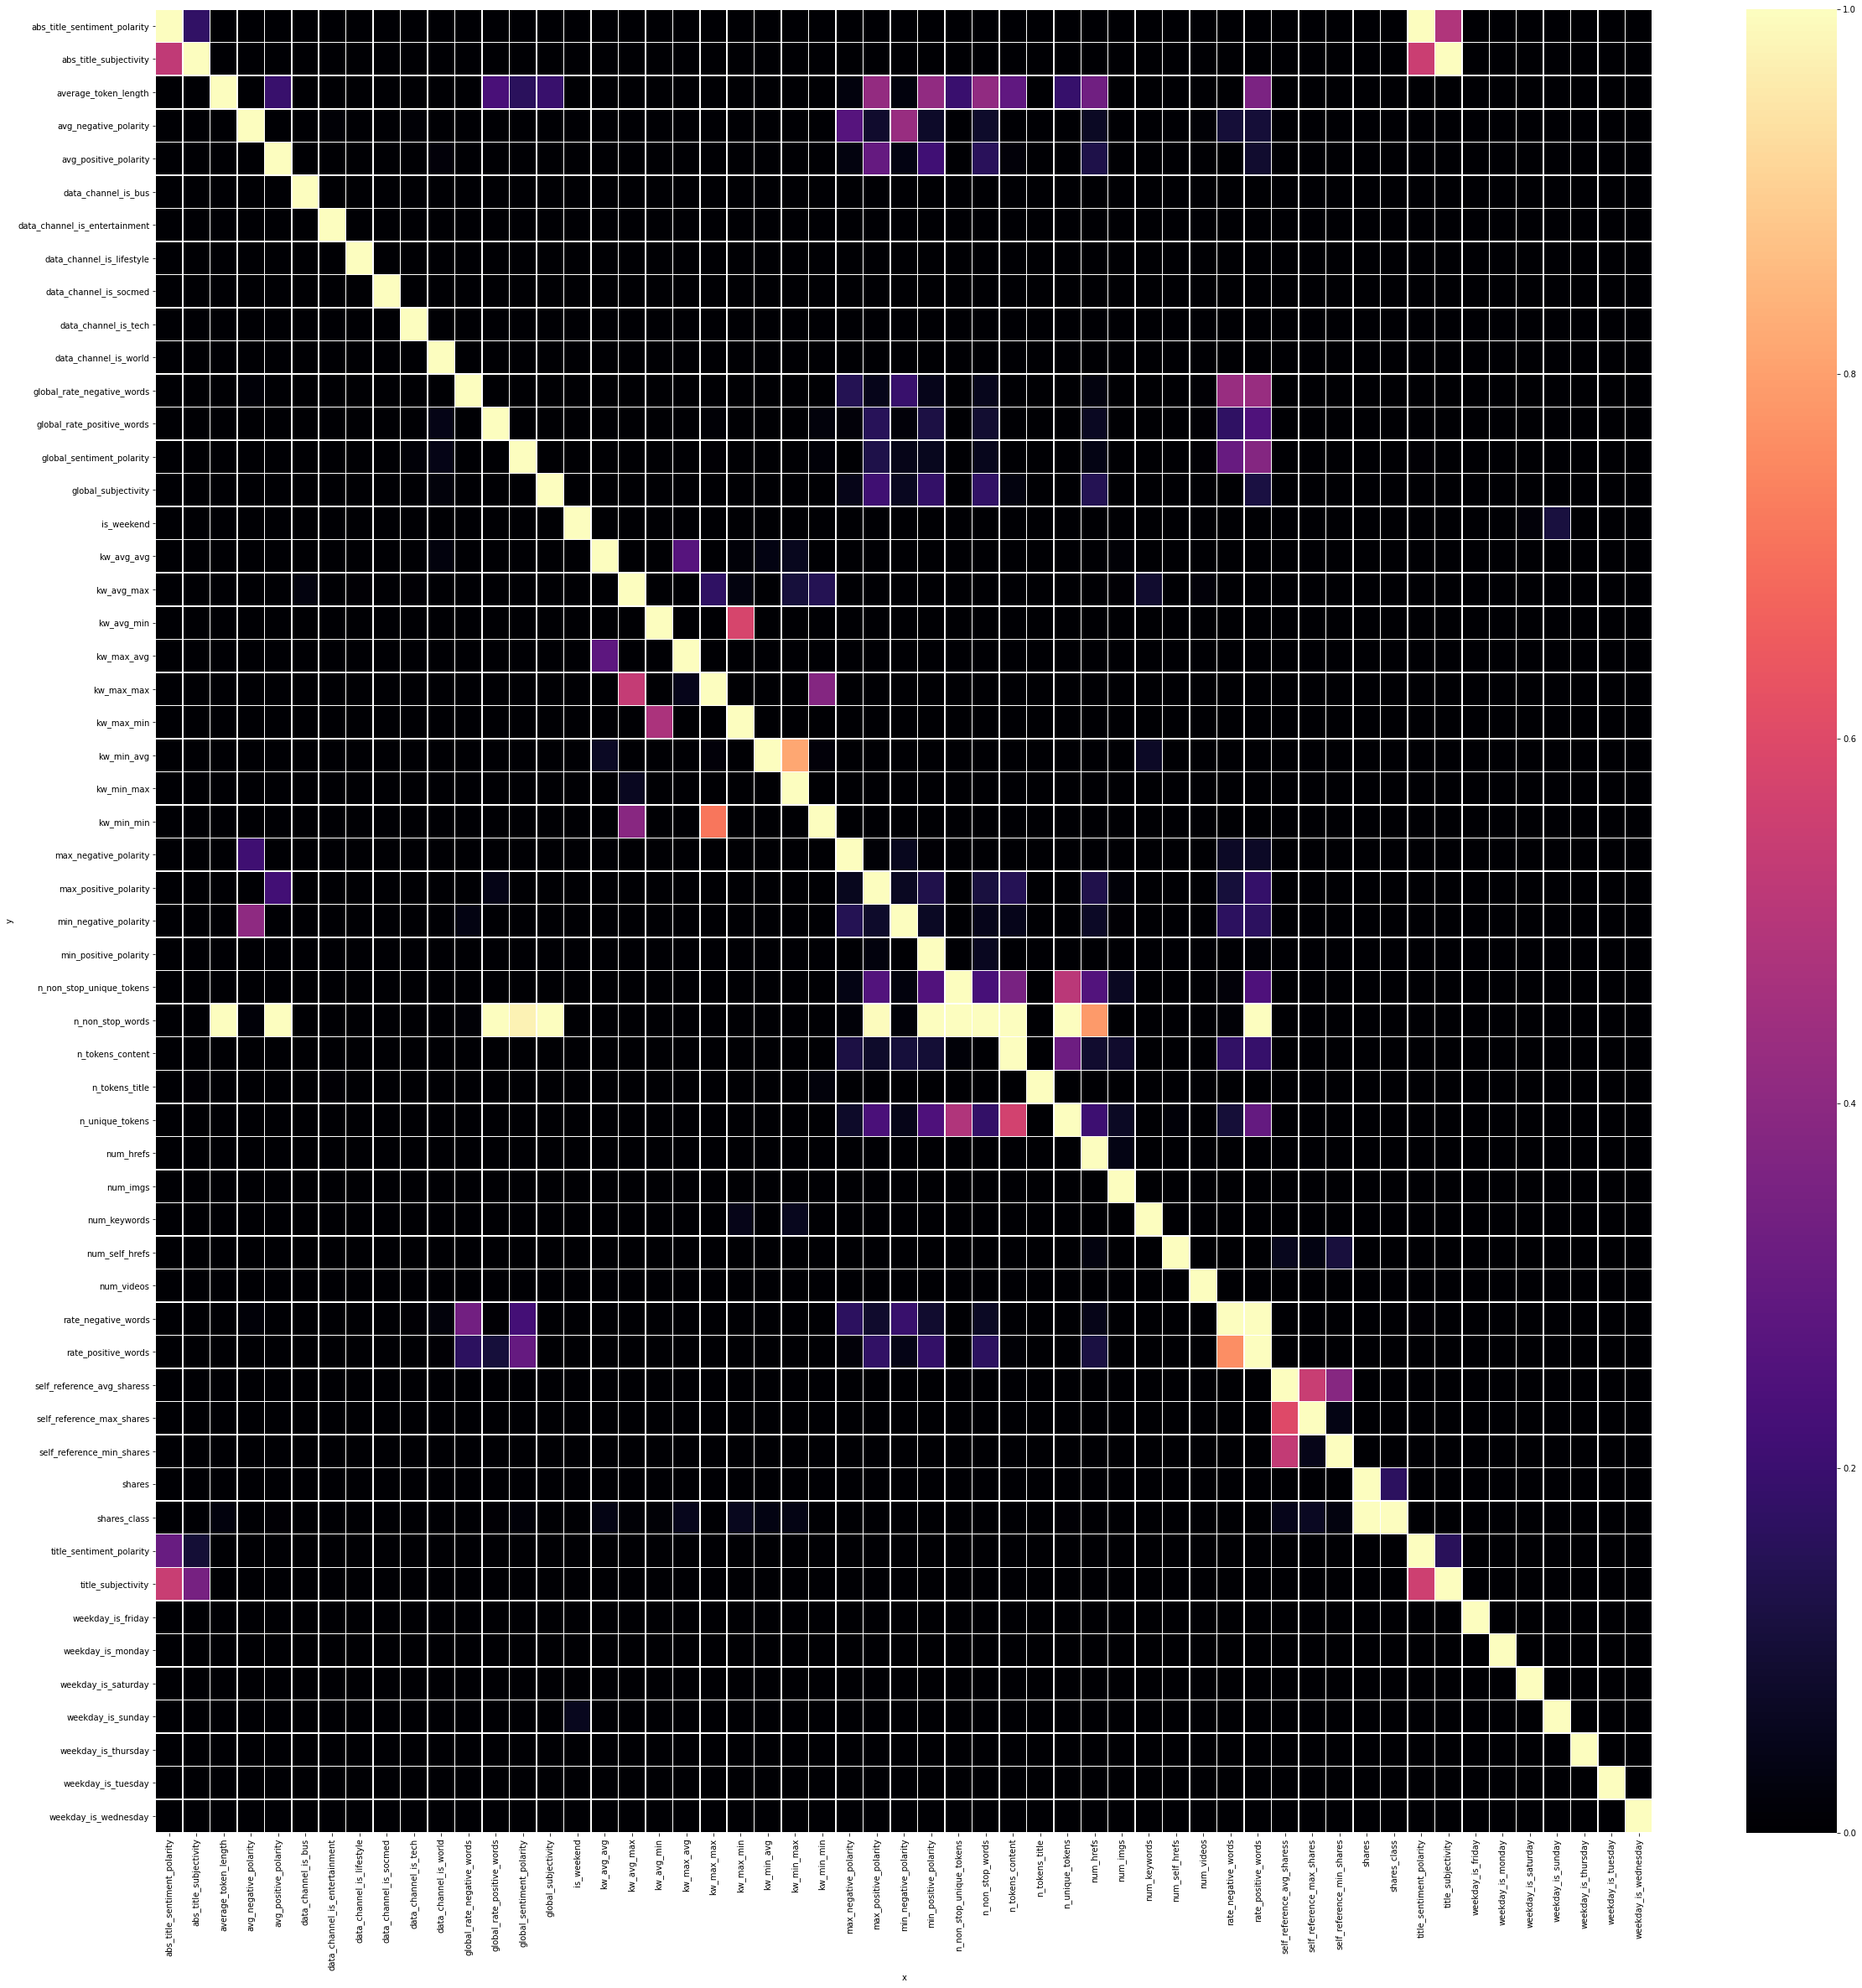

In [48]:
matrix_pps = ps_mat[['x','y','ppscore']].pivot(columns='x',index='y', values='ppscore')
plt.subplots(figsize = (40,40))

sns.heatmap(matrix_pps, vmin=0, vmax=1, cmap="magma",linewidths=0.5)
plt.show()

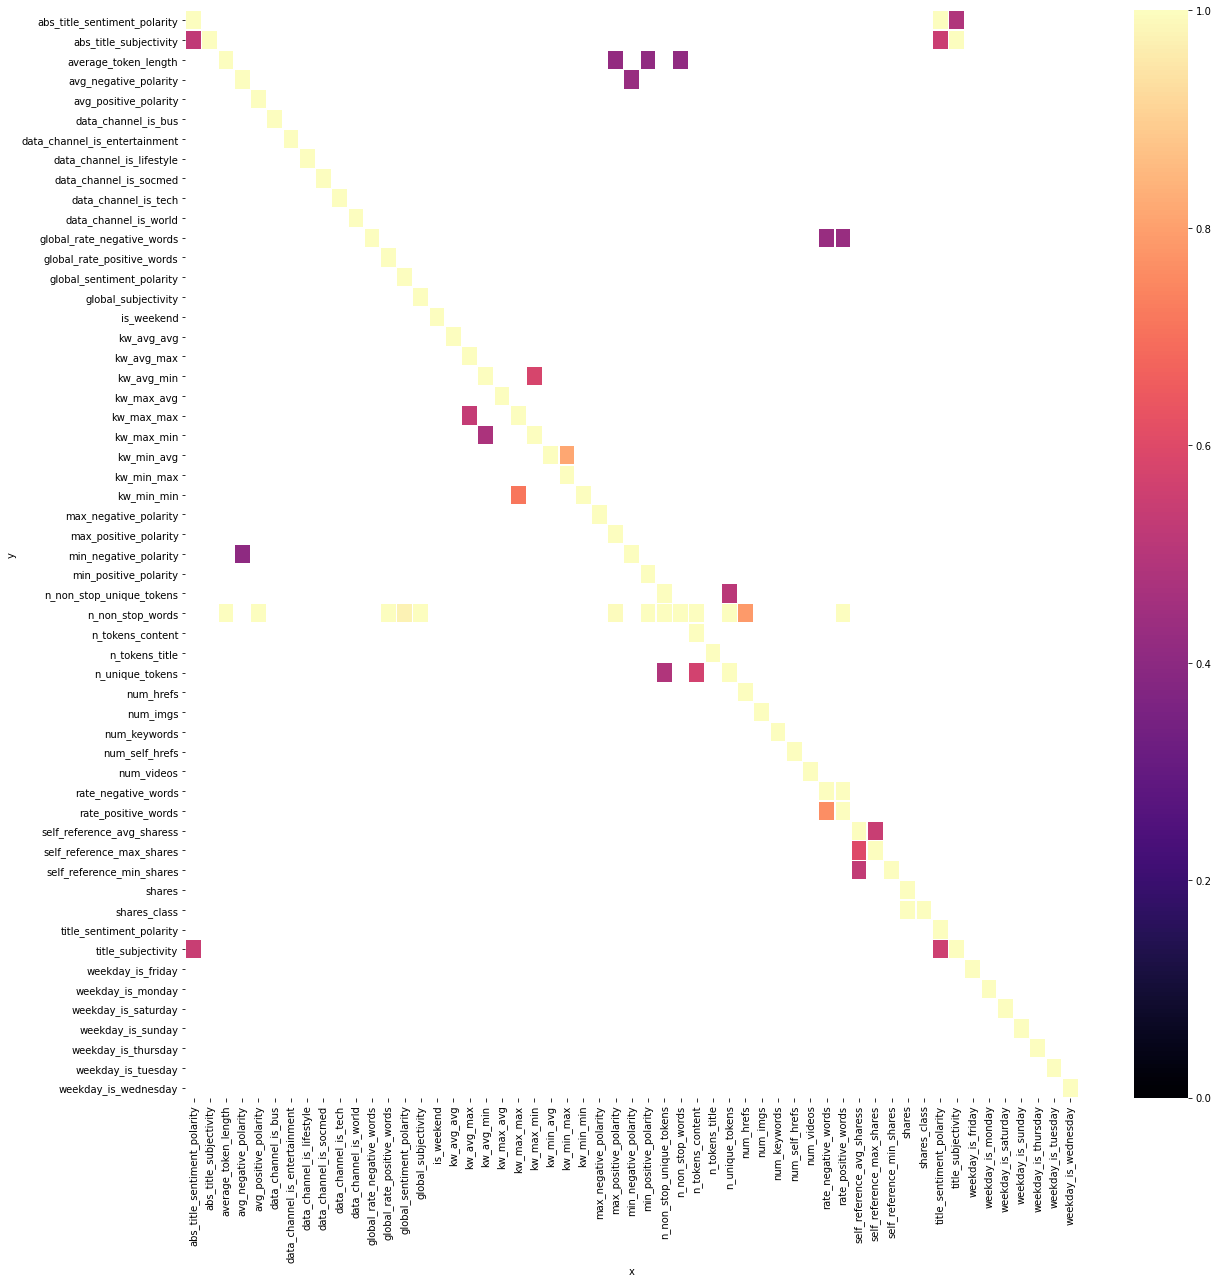

In [49]:
matrix_pps = ps_mat_small[['x','y','ppscore']].pivot(columns='x',index='y', values='ppscore')
plt.subplots(figsize = (20,20))

sns.heatmap(matrix_pps, vmin=0, vmax=1, cmap="magma",linewidths=0.5)
plt.show()

In [50]:
news.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              4.680365  ...                    0.7              -0.350000   
1              4.913725  ...                    0.7              -0.118750   
2              4.393365  ...                    1.0              -0.466667   
3              4.404896  ...                    0.8              -0.369697   
4              4.682836  ...                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_class  
0                      0.187500     593           low  
1                      0.000000     711           low  
2                      0.000000    1500        medium  
3                      0.000000    1200        medium  
4                      0.136364     505           low  

[5 rows x 55 columns]

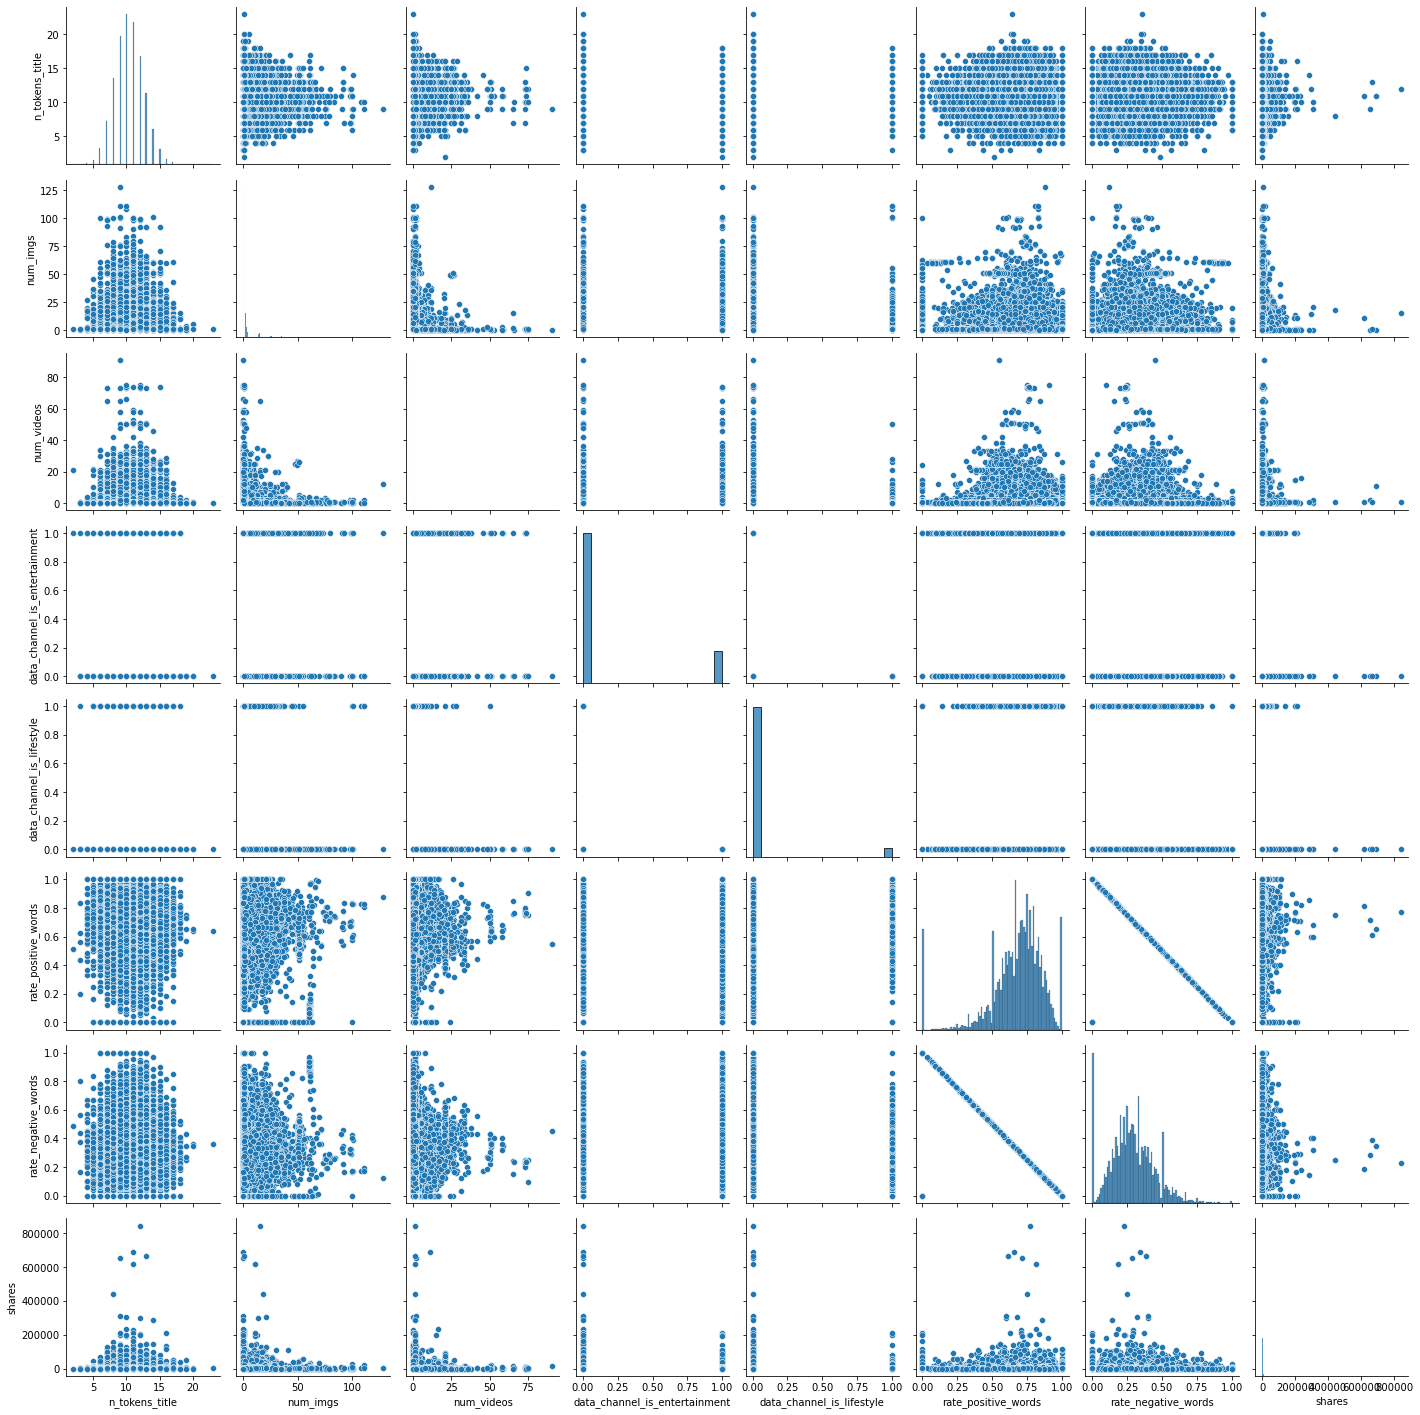

In [51]:
sns.pairplot(news[["n_tokens_title", "num_imgs", "num_videos", "data_channel_is_entertainment",
                  "data_channel_is_lifestyle", "rate_positive_words", "rate_negative_words","shares"]])

# ML

## Defining X and y

In [52]:
news.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              4.680365  ...                    0.7              -0.350000   
1              4.913725  ...                    0.7              -0.118750   
2              4.393365  ...                    1.0              -0.466667   
3              4.404896  ...                    0.8              -0.369697   
4              4.682836  ...                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_class  
0                      0.187500     593           low  
1                      0.000000     711           low  
2                      0.000000    1500        medium  
3                      0.000000    1200        medium  
4                      0.136364     505           low  

[5 rows x 55 columns]

In [53]:
news_cl = news.drop(["shares"], axis = 1)
news_cl.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  min_positive_polarity  max_positive_polarity  \
0              4.680365  ...               0.100000                    0.7   
1              4.913725  ...               0.033333                    0.7   
2              4.393365  ...               0.100000                    1.0   
3              4.404896  ...               0.136364                    0.8   
4              4.682836  ...               0.033333                    1.0   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares_class  
0                      0.187500           low  
1                      0.000000           low  
2                      0.000000        medium  
3                      0.000000        medium  
4                      0.136364           low  

[5 rows x 54 columns]

In [54]:
X = news_cl.drop("shares_class", axis = 1)
y = news_cl["shares_class"]

In [55]:
X

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  avg_positive_polarity  \
0             0.0              4.680365  ...               0.378636   
1             0.0              4.913725  ...               0.286915   
2             0.0              4.393365  ...               0.495833   
3             0.0              4.404896  ...               0.385965   
4             0.0              4.682836  ...               0.411127   
...           ...                   ...  ...                    ...   
39639         1.0              4.523121  ...               0.333791   
39640        48.0              4.405488  ...               0.374825   
39641         1.0              5.076923  ...               0.307273   
39642         0.0              4.975073  ...               0.236851   
39643         2.0              4.471338  ...               0.247338   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0                   0.100000                   0.70              -0.350000   
1                   0.033333                   0.70              -0.118750   
2                   0.100000                   1.00              -0.466667   
3                   0.136364                   0.80              -0.369697   
4                   0.033333                   1.00              -0.220192   
...                      ...                    ...                    ...   
39639               0.100000                   0.75              -0.260000   
39640               0.136364                   0.70              -0.211111   
39641               0.136364                   0.50              -0.356439   
39642               0.062500                   0.50              -0.205246   
39643               0.100000                   0.50              -0.200000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                     -0.600              -0.200000            0.500000   
1                     -0.125              -0.100000            0.000000   
2                     -0.800              -0.133333            0.000000   
3                     -0.600              -0.166667            0.000000   
4                     -0.500            

In [56]:
y

0           low
1           low
2        medium
3        medium
4           low
          ...  
39639    medium
39640    medium
39641    medium
39642    medium
39643    medium
Name: shares_class, Length: 39644, dtype: object

## Splitting dataset into training and test sets

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

## Scaling data

In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Model selection

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [60]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    MultinomialNB()
]

In [61]:
from sklearn.model_selection import cross_validate

In [62]:
for i in classifiers:
    cv_results = cross_validate(i, X_train, y_train, cv = 10, scoring = "accuracy")
    print(i, round(cv_results.get("test_score").mean(), 3))

DecisionTreeClassifier() 0.419
RandomForestClassifier() 0.512
KNeighborsClassifier() 0.439
SVC() 0.509
GaussianNB() 0.418


C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 641, in fit
    self._count(X, Y)
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 763, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1047, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to MultinomialNB (input X)

  warnings.warn("Estimator fit failed. The score on this trai

MultinomialNB() nan


C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 641, in fit
    self._count(X, Y)
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 763, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1047, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to MultinomialNB (input X)

  warnings.warn("Estimator fit failed. The score on this trai

In [63]:
from sklearn.ensemble import AdaBoostClassifier


In [64]:
classifiers_2 = [
    RandomForestClassifier(),
    AdaBoostClassifier()
       
]

In [65]:
for i in classifiers_2:
    cv_results = cross_validate(i, X_train, y_train, cv = 10, scoring = "accuracy")
    print(i, round(cv_results.get("test_score").mean(), 3))

RandomForestClassifier() 0.512
AdaBoostClassifier() 0.513


## Grid search

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
RandomForestClassifier()

RandomForestClassifier()

In [75]:
parameters = [{"n_estimators": [3,5,8,10,20,30,40,50,75, 100, 200], 
               "criterion": ["gini", "entropy"], 
               "max_depth": [None, 1,2,3]}
            ]

In [76]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = parameters, scoring = "accuracy", cv = 5, n_jobs = -1)

In [77]:
grid_search.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 1, 2, 3],
                          'n_estimators': [3, 5, 8, 10, 20, 30, 40, 50, 75, 100,
                                           200]}],
             scoring='accuracy')

In [78]:
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
print("Accuracy: ", best_accuracy)
print("Best params combination: ", best_params)


Accuracy:  0.5142992274948763
Best params combination:  {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}


In [148]:
dir(grid_search)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_

In [151]:
f_contr = grid_search.best_estimator_.feature_importances_

In [152]:
f_contr

array([0.0201068 , 0.03094254, 0.03221482, 0.00010726, 0.03197239,
       0.02502528, 0.01628077, 0.01694906, 0.00977359, 0.03308315,
       0.01706565, 0.00179934, 0.00665954, 0.00326715, 0.00439549,
       0.00566316, 0.00492648, 0.00657054, 0.03188423, 0.03454108,
       0.02060708, 0.00727758, 0.03591191, 0.0252425 , 0.04422036,
       0.04789228, 0.02997983, 0.02653741, 0.03125932, 0.00393823,
       0.00421993, 0.0044063 , 0.00425289, 0.00397362, 0.00264385,
       0.00247436, 0.00824295, 0.0324362 , 0.03003314, 0.03121678,
       0.02863395, 0.02527141, 0.02554122, 0.03128894, 0.01471028,
       0.01355745, 0.02943133, 0.01840708, 0.0173687 , 0.01705057,
       0.01752692, 0.0153957 , 0.01582159])

In [153]:
X

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  avg_positive_polarity  \
0             0.0              4.680365  ...               0.378636   
1             0.0              4.913725  ...               0.286915   
2             0.0              4.393365  ...               0.495833   
3             0.0              4.404896  ...               0.385965   
4             0.0              4.682836  ...               0.411127   
...           ...                   ...  ...                    ...   
39639         1.0              4.523121  ...               0.333791   
39640        48.0              4.405488  ...               0.374825   
39641         1.0              5.076923  ...               0.307273   
39642         0.0              4.975073  ...               0.236851   
39643         2.0              4.471338  ...               0.247338   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0                   0.100000                   0.70              -0.350000   
1                   0.033333                   0.70              -0.118750   
2                   0.100000                   1.00              -0.466667   
3                   0.136364                   0.80              -0.369697   
4                   0.033333                   1.00              -0.220192   
...                      ...                    ...                    ...   
39639               0.100000                   0.75              -0.260000   
39640               0.136364                   0.70              -0.211111   
39641               0.136364                   0.50              -0.356439   
39642               0.062500                   0.50              -0.205246   
39643               0.100000                   0.50              -0.200000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                     -0.600              -0.200000            0.500000   
1                     -0.125              -0.100000            0.000000   
2                     -0.800              -0.133333            0.000000   
3                     -0.600              -0.166667            0.000000   
4                     -0.500            

In [156]:
col_names1 = X.columns

In [154]:
type(X)

pandas.core.frame.DataFrame

In [158]:
frame = { 'features': col_names1, 'score': f_contr } 

In [159]:
frame

{'features': Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
        'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
        'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
        'num_keywords', 'data_channel_is_lifestyle',
        'data_channel_is_entertainment', 'data_channel_is_bus',
        'data_channel_is_socmed', 'data_channel_is_tech',
        'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
        'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
        'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
        'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
        'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
        'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
        'global_subjectivity', 'global_sentiment_polarity',
        'global_rate_positive_words', 'global_rate_negative_words',
        'rate_posit

In [162]:
features_score = pd.DataFrame(frame)

In [166]:
features_score

features     score
0                  n_tokens_title  0.020107
1                n_tokens_content  0.030943
2                 n_unique_tokens  0.032215
3                n_non_stop_words  0.000107
4        n_non_stop_unique_tokens  0.031972
5                       num_hrefs  0.025025
6                  num_self_hrefs  0.016281
7                        num_imgs  0.016949
8                      num_videos  0.009774
9            average_token_length  0.033083
10                   num_keywords  0.017066
11      data_channel_is_lifestyle  0.001799
12  data_channel_is_entertainment  0.006660
13            data_channel_is_bus  0.003267
14         data_channel_is_socmed  0.004395
15           data_channel_is_tech  0.005663
16          data_channel_is_world  0.004926
17                     kw_min_min  0.006571
18                     kw_max_min  0.031884
19                     kw_avg_min  0.034541
20                     kw_min_max  0.020607
21                     kw_max_max  0.007278
22                     kw_avg_max  0.035912
23                     kw_min_avg  0.025243
24                     kw_max_avg  0.044220
25                     kw_avg_avg  0.047892
26      self_reference_min_shares  0.029980
27      self_reference_max_shares  0.026537
28     self_reference_avg_sharess  0.031259
29              weekday_is_monday  0.003938
30             weekday_is_tuesday  0.004220
31           weekday_is_wednesday  0.004406
32            weekday_is_thursday  0.004253
33              weekday_is_friday  0.003974
34            weekday_is_saturday  0.002644
35              weekday_is_sunday  0.002474
36                     is_weekend  0.008243
37            global_subjectivity  0.032436
38      global_sentiment_polarity  0.030033
39     global_rate_positive_words  0.031217
40     global_rate_negative_words  0.028634
41            rate_positive_words  0.025271
42            rate_negative_words  0.025541
43          avg_positive_polarity  0.031289
44          min_positive_polarity  0.014710
45          max_positive_polarity  0.013557
46          avg_negative_polarity  0.029431
47          min_negative_polarity  0.018407
48          max_negative_polarity  0.017369
49             title_subjectivity  0.017051
50       title_sentiment_polarity  0.017527
51         abs_title_subjectivity  0.015396
52   abs_title_sentiment_polarity  0.015822

In [170]:
sorted_features_score = features_score.sort_values(by='score', ascending=False)

In [171]:
sorted_features_score

features     score
25                     kw_avg_avg  0.047892
24                     kw_max_avg  0.044220
22                     kw_avg_max  0.035912
19                     kw_avg_min  0.034541
9            average_token_length  0.033083
37            global_subjectivity  0.032436
2                 n_unique_tokens  0.032215
4        n_non_stop_unique_tokens  0.031972
18                     kw_max_min  0.031884
43          avg_positive_polarity  0.031289
28     self_reference_avg_sharess  0.031259
39     global_rate_positive_words  0.031217
1                n_tokens_content  0.030943
38      global_sentiment_polarity  0.030033
26      self_reference_min_shares  0.029980
46          avg_negative_polarity  0.029431
40     global_rate_negative_words  0.028634
27      self_reference_max_shares  0.026537
42            rate_negative_words  0.025541
41            rate_positive_words  0.025271
23                     kw_min_avg  0.025243
5                       num_hrefs  0.025025
20                     kw_min_max  0.020607
0                  n_tokens_title  0.020107
47          min_negative_polarity  0.018407
50       title_sentiment_polarity  0.017527
48          max_negative_polarity  0.017369
10                   num_keywords  0.017066
49             title_subjectivity  0.017051
7                        num_imgs  0.016949
6                  num_self_hrefs  0.016281
52   abs_title_sentiment_polarity  0.015822
51         abs_title_subjectivity  0.015396
44          min_positive_polarity  0.014710
45          max_positive_polarity  0.013557
8                      num_videos  0.009774
36                     is_weekend  0.008243
21                     kw_max_max  0.007278
12  data_channel_is_entertainment  0.006660
17                     kw_min_min  0.006571
15           data_channel_is_tech  0.005663
16          data_channel_is_world  0.004926
31           weekday_is_wednesday  0.004406
14         data_channel_is_socmed  0.004395
32            weekday_is_thursday  0.004253
30             weekday_is_tuesday  0.004220
33              weekday_is_friday  0.003974
29              weekday_is_monday  0.003938
13            data_channel_is_bus  0.003267
34            weekday_is_saturday  0.002644
35              weekday_is_sunday  0.002474
11      data_channel_is_lifestyle  0.001799
3                n_non_stop_words  0.000107

## Predictions

In [79]:
grid_search.predict_proba(X_test)

array([[0.22 , 0.36 , 0.42 ],
       [0.22 , 0.215, 0.565],
       [0.26 , 0.34 , 0.4  ],
       ...,
       [0.17 , 0.285, 0.545],
       [0.355, 0.185, 0.46 ],
       [0.2  , 0.4  , 0.4  ]])

In [80]:
y_pred = grid_search.predict(X_test)

In [81]:
# confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 335  268 1196]
 [ 115 1187 1176]
 [ 297  768 2587]]


In [82]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, \
    classification_report, accuracy_score, f1_score

In [83]:
print("Accuracy: ", accuracy_score(y_test, y_pred))



Accuracy:  0.5182242401311641


In [84]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

        high       0.45      0.19      0.26      1799
         low       0.53      0.48      0.50      2478
      medium       0.52      0.71      0.60      3652

    accuracy                           0.52      7929
   macro avg       0.50      0.46      0.46      7929
weighted avg       0.51      0.52      0.49      7929



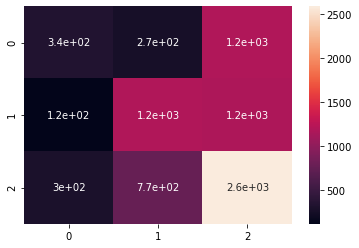

In [86]:
sns.heatmap(cm, annot = True)
x.ticks
plt.show()

In [87]:
cm

array([[ 335,  268, 1196],
       [ 115, 1187, 1176],
       [ 297,  768, 2587]], dtype=int64)

In [95]:
cm.sum()

7929

In [ ]:
# base line calculated for the biggest class, medium 3652, total 7929
# base line = 0.46

# accuracy of the model is 0.52, so our model predicts better than 
# a random classifier

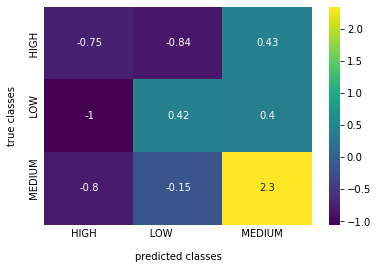

In [137]:
df_norm_col=(cm-cm.mean())/cm.std()
sns.heatmap(df_norm_col, cmap='viridis',xticklabels=False, yticklabels=False, annot = True)
plt.xlabel("HIGH                 LOW                      MEDIUM \n\npredicted classes")
plt.ylabel("true classes\n\n MEDIUM             LOW            HIGH ")

plt.show()

In [ ]:
# MEDIUM class will be classified as MEDIUM but it is the largest class
# LOW class mostly will be classify by machine as LOW and MEDIUM
# HIGH class will be classified as MEDIUM